In [28]:
import pandas as pd
df = pd.read_csv('/kaggle/input/divvy-2022-23/Output (1).csv')

In [29]:
df.fillna(df.mean(numeric_only=True), inplace=True)  # Only fill numeric columns with their means
df.fillna('Unknown', inplace=True)

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report

target_variable = 'rideable_type'
y = df[target_variable]
X = df.drop(target_variable, axis=1)

# Apply encoding to the features
label_encoders = {}
for column in X.columns:
    if X[column].dtype == 'object':  # This identifies categorical columns
        num_unique_values = len(X[column].unique())
        if num_unique_values < 10:  # Limit set for one-hot encoding
            # Apply one-hot encoding to columns with fewer unique values
            dummies = pd.get_dummies(X[column], prefix=column)
            X = pd.concat([X, dummies], axis=1)
        else:
            # Apply label encoding to columns with many unique values to save memory
            label_encoders[column] = LabelEncoder()
            X[column] = label_encoders[column].fit_transform(X[column].astype(str))
        X.drop(column, axis=1, inplace=True)  # Drop original column after encoding

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [23]:
y_train_encoded = (y_train == 'electric').astype(int)  # Encode 'electric' as 1, 'classic' as 0
y_test_encoded = (y_test == 'electric').astype(int)

In [24]:

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Assuming X_train, X_test, y_train, and y_test have already been defined and split appropriately

# Encode 'electric' as 1, 'classic' as 0 in both training and testing labels
y_train_encoded = (y_train == 'electric').astype(int)
y_test_encoded = (y_test == 'electric').astype(int)

# Initialize the LinearRegression model
model = LinearRegression()

# Fit the model on the training data with encoded labels
model.fit(X_train, y_train_encoded)

# Predict on the test set
y_pred = model.predict(X_test)

# Calculating R-squared and Mean Squared Error based on predictions and the true test labels
mse = mean_squared_error(y_test_encoded, y_pred)
r2 = r2_score(y_test_encoded, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")

# Displaying coefficients
coefficients = pd.DataFrame(model.coef_, X_train.columns, columns=['Coefficient'])
print(coefficients)

from sklearn.metrics import recall_score, f1_score, precision_score, classification_report

# Predict on the test set (assuming `model` has already been trained on `X_train, y_train_encoded`)
y_pred = model.predict(X_test)  # This should be predictions on the test set
y_pred_encoded = (y_pred > 0.5).astype(int)  # Assuming you're using a threshold of 0.5 if needed

# Calculate recall, F1 score using the encoded test labels and predictions
recall = recall_score(y_test_encoded, y_pred_encoded)  # pos_label defaults to 1 which is suitable here
f1 = f1_score(y_test_encoded, y_pred_encoded)

# Print recall and F1-score
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")

# For a comprehensive report including precision and support per class
report = classification_report(y_test_encoded, y_pred_encoded)
print(report)

Mean Squared Error: 0.24815011076878607
R² Score: 0.00678783227747759
                        Coefficient
Elevation_Change      -2.161199e-04
Distance              -2.003583e-05
trip_duration         -9.359789e-05
TMAX                  -1.588950e-03
TMIN                  -2.694059e-04
member_casual_Unknown -5.204170e-18
member_casual_casual   2.735762e-02
member_casual_member  -2.735762e-02
season_Fall            1.525531e-02
season_Spring          1.849525e-03
season_Summer          8.342118e-03
season_Winter         -2.544695e-02
day_of_week_Friday     1.708638e-02
day_of_week_Monday    -5.980562e-03
day_of_week_Saturday  -2.203042e-02
day_of_week_Sunday    -2.604875e-02
day_of_week_Thursday   1.682715e-02
day_of_week_Tuesday    5.087729e-03
day_of_week_Wednesday  1.505847e-02
Recall: 0.6440387883634909
F1-Score: 0.5850402971993045
              precision    recall  f1-score   support

           0       0.53      0.41      0.46   1665742
           1       0.54      0.64      0.59  

In [25]:
del df

In [26]:
from sklearn.ensemble import RandomForestClassifier

# Assuming RandomForestClassifier is fitted as `rf`
rf = RandomForestClassifier(n_estimators=10, max_depth=10, random_state=42)  # Limiting depth

rf.fit(X_train, y_train)

# Feature importancesz
importances = rf.feature_importances_
feature_names = X_train.columns

# Create a DataFrame to view the features and their importance scores
importances_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances}).sort_values(by='Importance', ascending=False)
print(importances_df)

                  Feature  Importance
2           trip_duration    0.453425
1                Distance    0.387993
0        Elevation_Change    0.074622
7    member_casual_member    0.023871
6    member_casual_casual    0.020117
3                    TMAX    0.015375
4                    TMIN    0.010103
8             season_Fall    0.002813
10          season_Summer    0.002741
14   day_of_week_Saturday    0.001753
9           season_Spring    0.001740
15     day_of_week_Sunday    0.001492
11          season_Winter    0.001116
12     day_of_week_Friday    0.000809
18  day_of_week_Wednesday    0.000772
16   day_of_week_Thursday    0.000593
17    day_of_week_Tuesday    0.000417
13     day_of_week_Monday    0.000248
5   member_casual_Unknown    0.000000


In [27]:


# Assuming `rf` is your trained RandomForestClassifier
y_pred = rf.predict(X_test)

from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
# Calculate metrics for each class
precision = precision_score(y_test, y_pred, average=None)  # returns an array for each class
recall = recall_score(y_test, y_pred, average=None)
f1 = f1_score(y_test, y_pred, average=None)

print("Precision by class:", precision)
print("Recall by class:", recall)
print("F1-Score by class:", f1)
# Print a classification report
report = classification_report(y_test, y_pred)
print(report)

Precision by class: [0.65204612 0.70063805]
Recall by class: [0.71371317 0.63758472]
F1-Score by class: [0.68148744 0.66762594]
              precision    recall  f1-score   support

     classic       0.65      0.71      0.68   1665742
    electric       0.70      0.64      0.67   1750525

    accuracy                           0.67   3416267
   macro avg       0.68      0.68      0.67   3416267
weighted avg       0.68      0.67      0.67   3416267



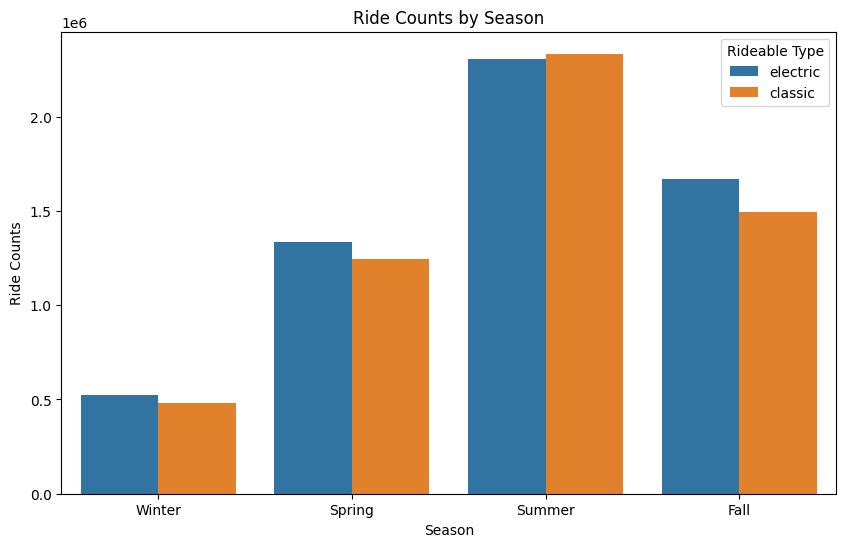

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns


# Convert 'started_at' column to datetime objects
df['started_at'] = pd.to_datetime(df['started_at'])


# Plot ride counts by season for electric and classic bikes
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='season', hue='rideable_type')
plt.title('Ride Counts by Season')
plt.xlabel('Season')
plt.ylabel('Ride Counts')
plt.legend(title='Rideable Type')
plt.show()


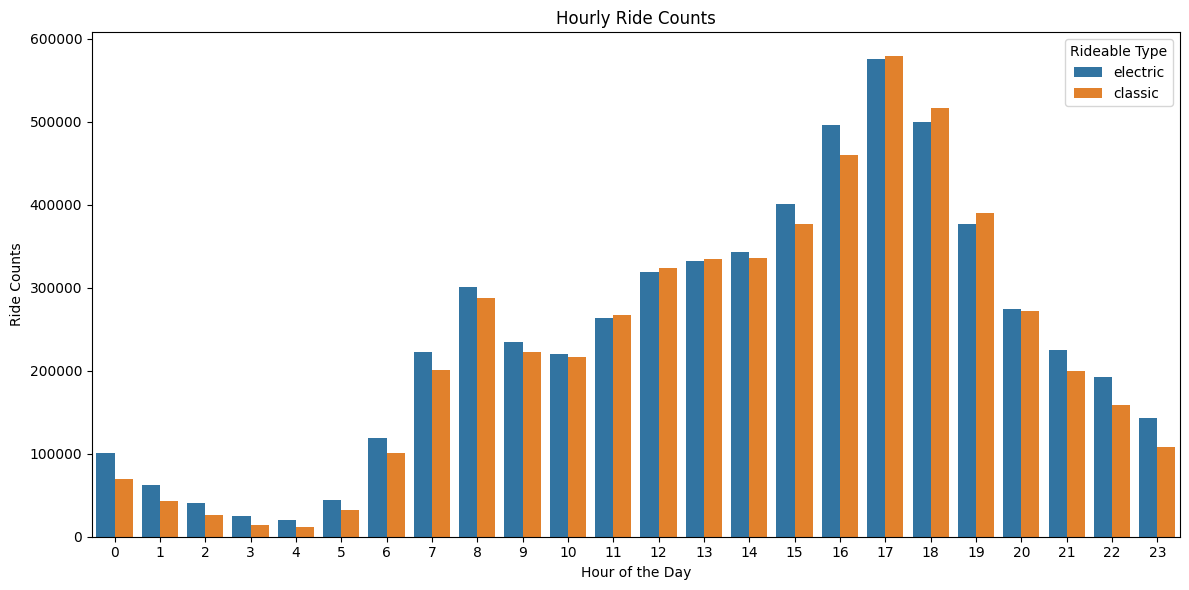

In [34]:
# Extract hour from 'ended_at' column
df['hour'] = df['ended_at'].dt.hour

# Plot hourly ride counts for bike and escooter
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='hour', hue='rideable_type')
plt.title('Hourly Ride Counts')
plt.xlabel('Hour of the Day')
plt.ylabel('Ride Counts')
plt.legend(title='Rideable Type')
plt.xticks(range(24))
plt.tight_layout()
plt.show()


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


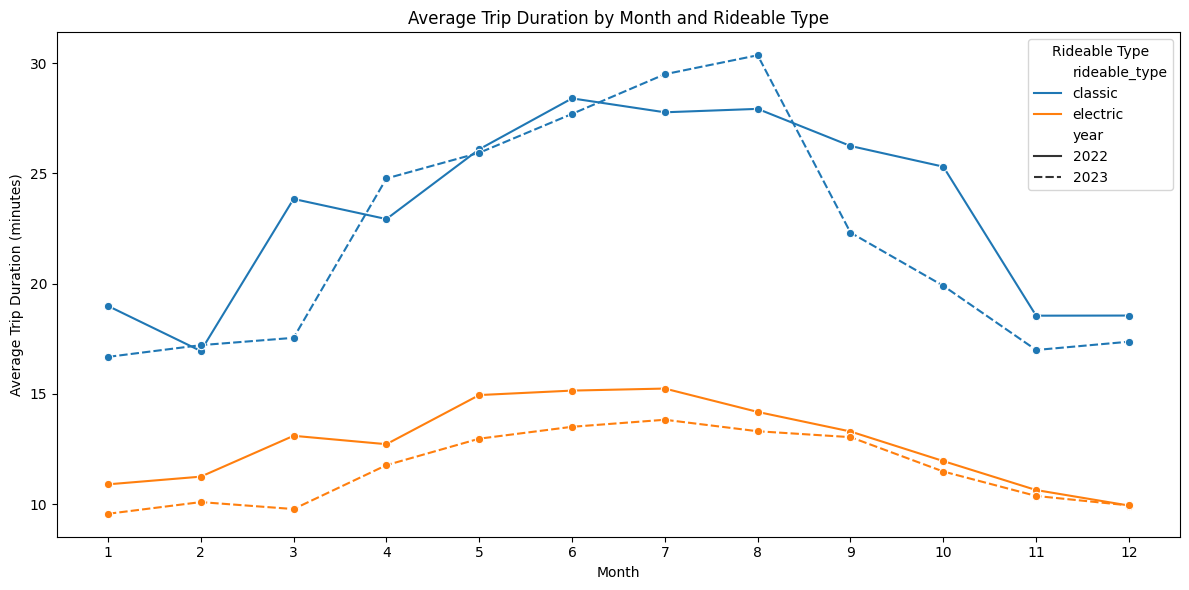

In [36]:
# Group by year, month, and rideable_type and calculate average trip duration
monthly_avg_trip_duration = df.groupby(['year', 'month', 'rideable_type'])['trip_duration'].mean().reset_index()

# Plot average trip duration on a monthly basis, differentiated by rideable type
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_avg_trip_duration, x='month', y='trip_duration', hue='rideable_type', style='year', marker='o')
plt.title('Average Trip Duration by Month and Rideable Type')
plt.xlabel('Month')
plt.ylabel('Average Trip Duration (minutes)')
plt.xticks(range(1, 13))
plt.legend(title='Rideable Type')
plt.tight_layout()
plt.show()


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


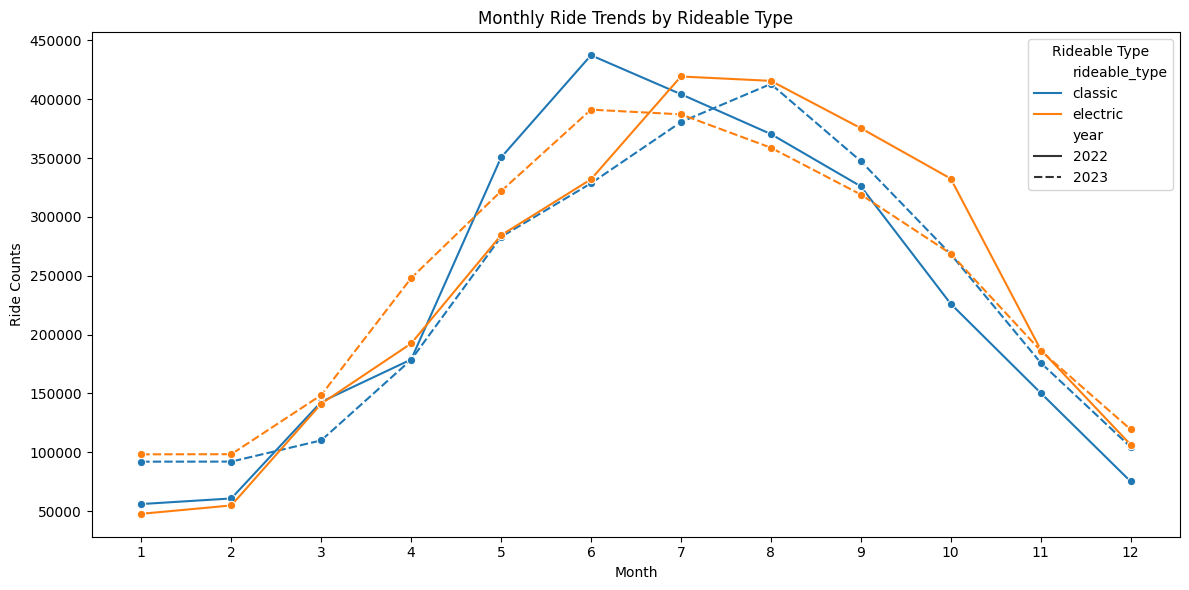

In [37]:
# Group by year, month, and rideable_type and calculate ride counts
monthly_ride_counts = df.groupby(['year', 'month', 'rideable_type']).size().reset_index(name='ride_counts')

# Plot monthly trends for each rideable type
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_ride_counts, x='month', y='ride_counts', hue='rideable_type', style='year', marker='o')
plt.title('Monthly Ride Trends by Rideable Type')
plt.xlabel('Month')
plt.ylabel('Ride Counts')
plt.xticks(range(1, 13))
plt.legend(title='Rideable Type')
plt.tight_layout()
plt.show()


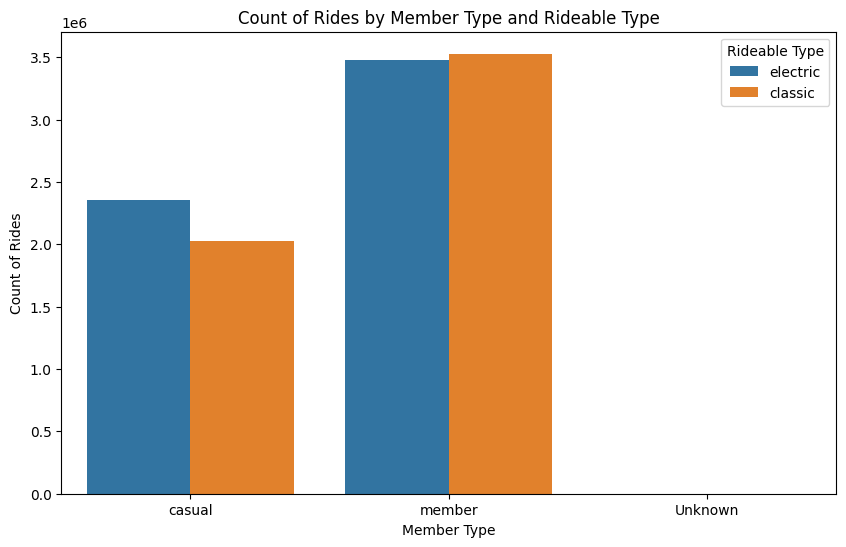

In [39]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='member_casual', hue='rideable_type')
plt.title('Count of Rides by Member Type and Rideable Type')
plt.xlabel('Member Type')
plt.ylabel('Count of Rides')
plt.legend(title='Rideable Type')
plt.show()

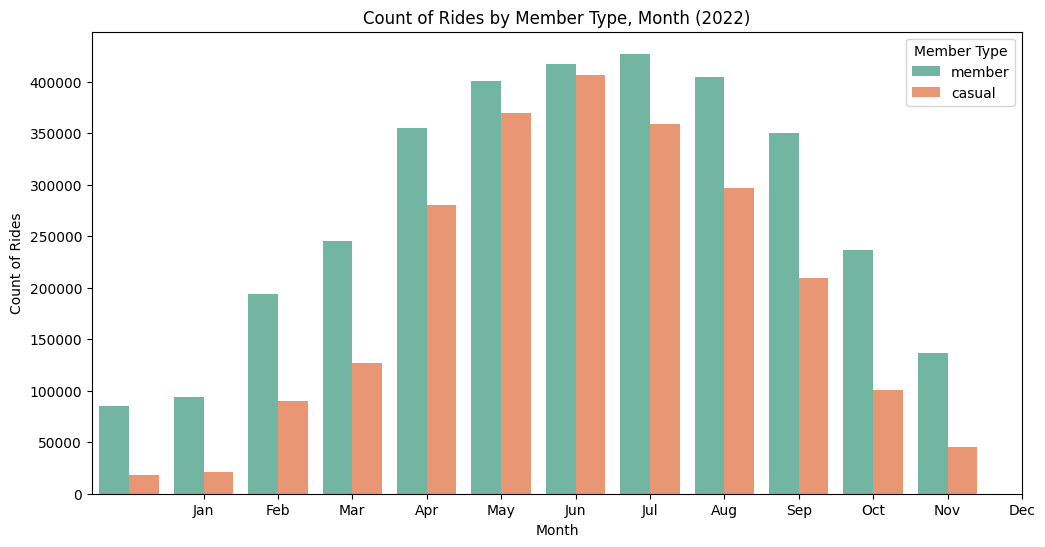

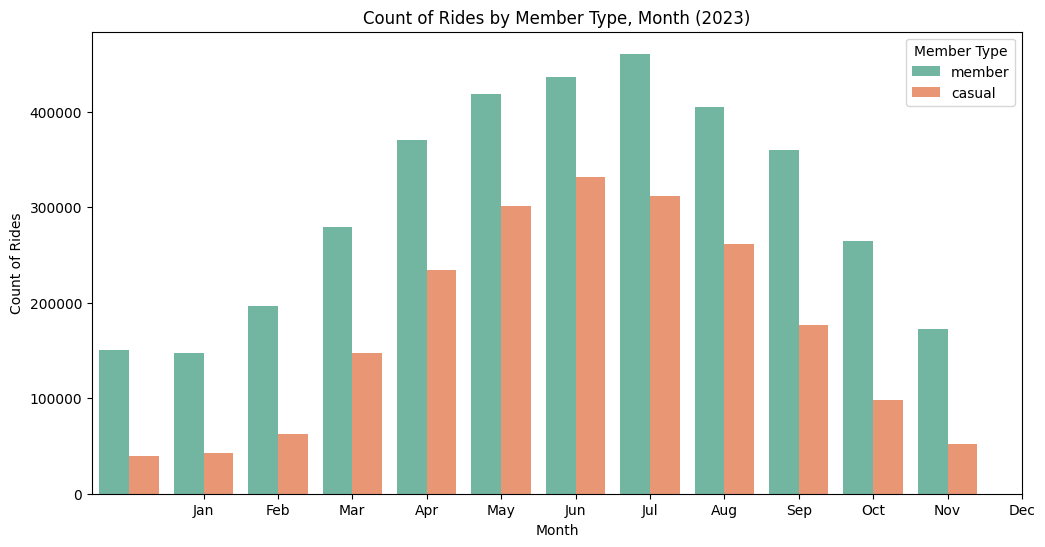

In [50]:
ride_counts = df.groupby(['year', 'month', 'member_casual']).size().reset_index(name='count')

# Plot the count of rides by member type, year, and month
for year in df['year'].unique():
    plt.figure(figsize=(12, 6))
    ride_counts_year = ride_counts[ride_counts['year'] == year]
    sns.barplot(data=ride_counts_year, x='month', y='count', hue='member_casual', hue_order=['member', 'casual'], palette='Set2')
    plt.title(f'Count of Rides by Member Type, Month ({year})')
    plt.xlabel('Month')
    plt.ylabel('Count of Rides')
    plt.legend(title='Member Type')
    plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
    plt.show()

